In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Load excel
PATH = './'
df_raw = pd.read_excel(f'{PATH}sample.xlsx')
df_raw.head()

,Date,Total_1,Total_2
0,29-JUL-17,6330,8044
1,29-JUL-17,1475,7123
2,29-JUL-17,6815,1605
3,29-JUL-17,7470,7028
4,29-JUL-17,9380,4646


In [25]:
# Create new tables

# Create the new table with the accounting date and dollars
df_sample1 =  df_raw[['Date', 'Total_1']]
df_sample2 =  df_raw[['Date', 'Total_2']]

# Convert date string to a datetime
df_sample1['Date'] = pd.to_datetime(df_sample1['Date'])
df_sample2['Date'] = pd.to_datetime(df_sample2['Date'])



/home/reverts/.virtualenvs/fastai-0.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/reverts/.virtualenvs/fastai-0.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [26]:
df_sample1.head()

,Date,Total_1
0,2017-07-29,6330
1,2017-07-29,1475
2,2017-07-29,6815
3,2017-07-29,7470
4,2017-07-29,9380


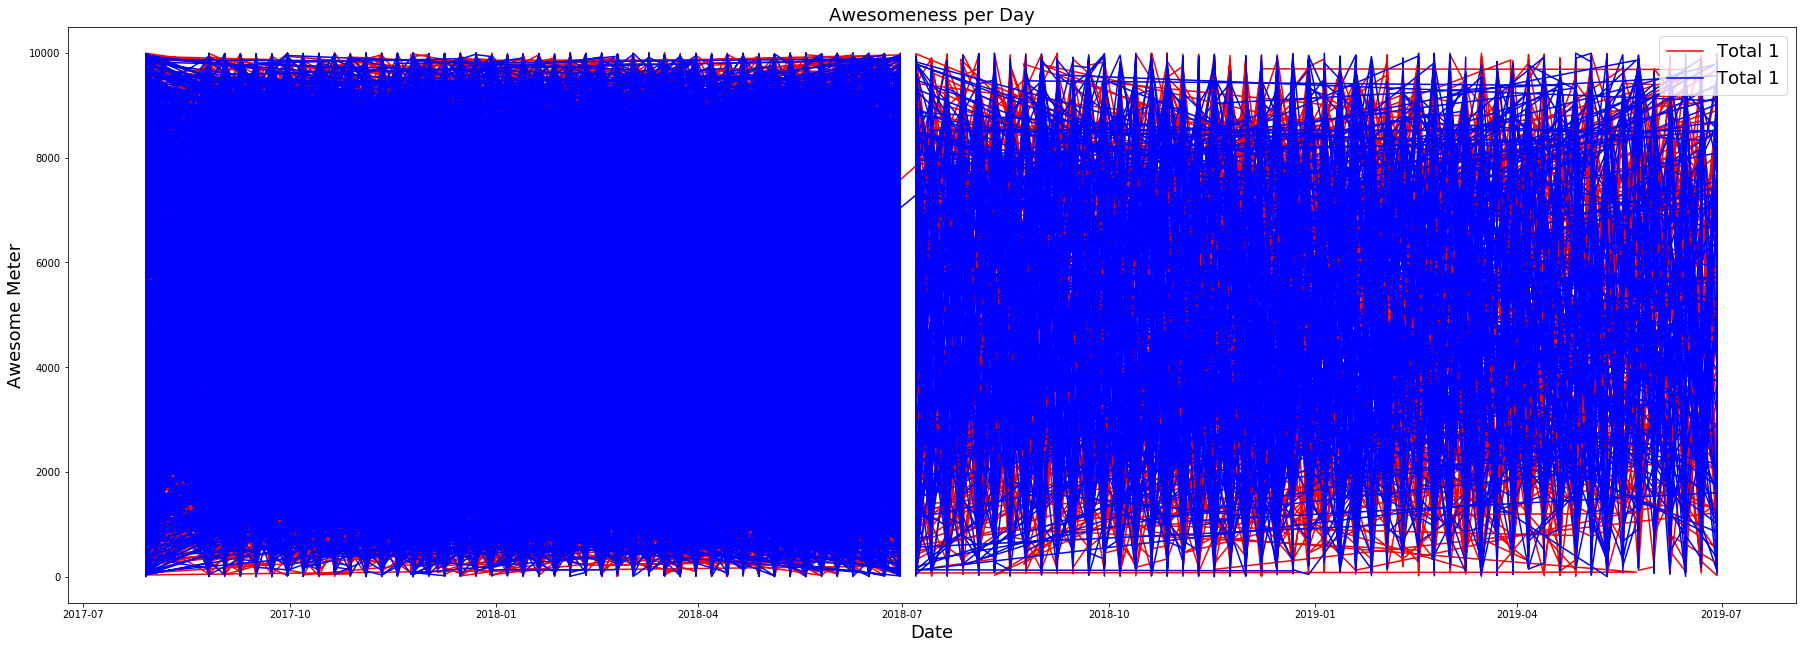

In [27]:
# Graph two lines at same time

# Set up the graph
fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# These do take hex values color="#000", so we can set a random hex value generator
plt.plot(df_sample1['Date'], df_sample1['Total_1'], color="red", label='Total 1')
plt.plot(df_sample2['Date'], df_sample2['Total_2'], color="blue", label='Total 1')

# Specify the fontsize on the legend
plt.legend(fontsize=18)

# Specify labels, legend, and show the plot
plt.xlabel('Date', fontsize=18)
plt.ylabel('Awesome Meter', fontsize=18)
plt.title(f"Awesomeness per Day", fontsize=18)

plt.show()
# plt.savefig(f'awesome.png')

In [29]:
# That's terrible! Let's group these together
df_sample1_ = df_sample1.groupby('Date')[['Total_1']].sum()
df_sample2_ = df_sample2.groupby('Date')[['Total_2']].sum()

df_sample1_.head()

,Total_1
Date,
2017-07-29,7576317
2017-08-26,7724735
2017-09-02,4860227
2017-09-09,4338207
2017-09-16,4184406


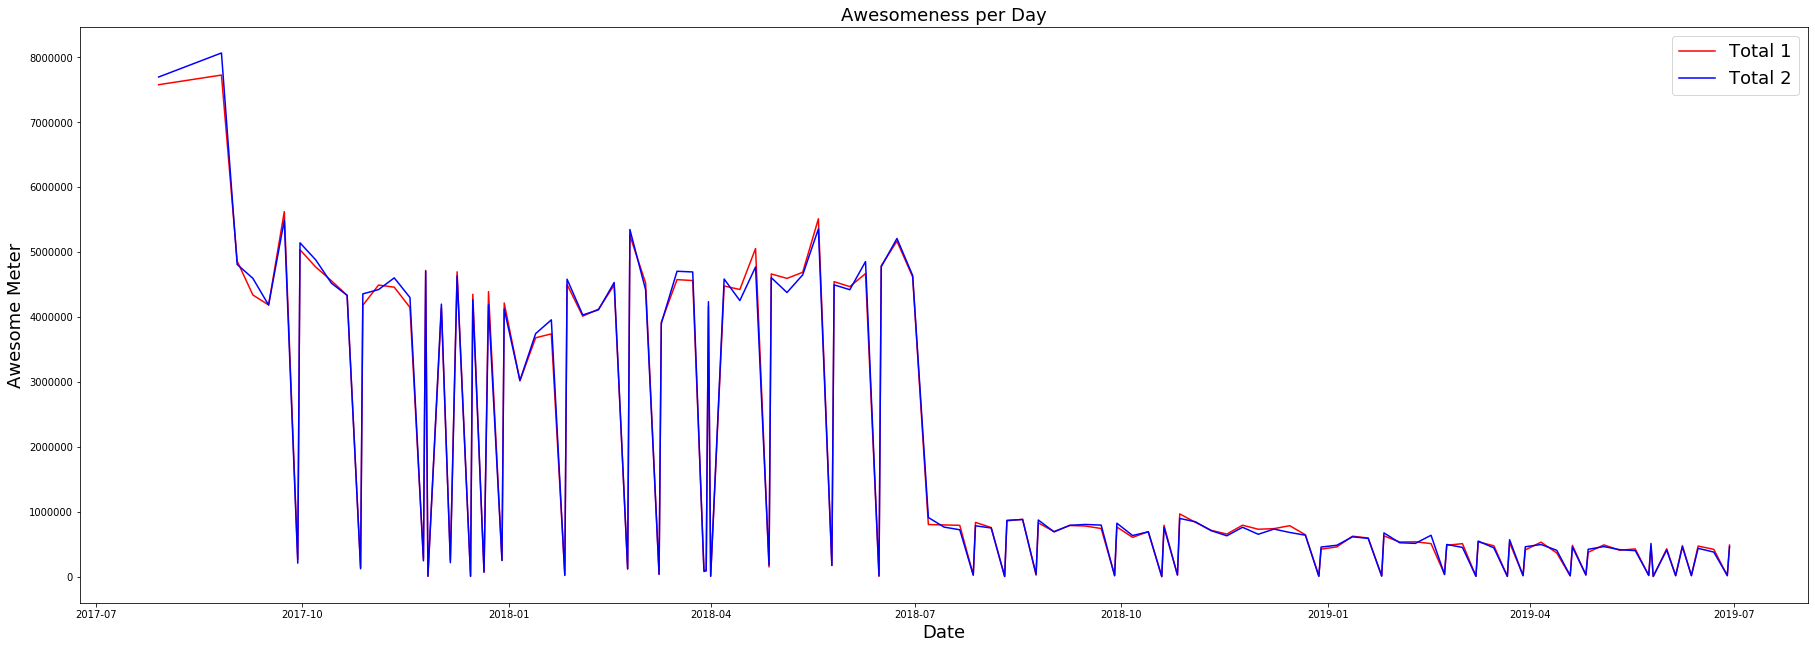

In [31]:
# Graph two lines at same time

# Set up the graph
fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# These do take hex values color="#000", so we can set a random hex value generator
plt.plot(df_sample1_.index, df_sample1_['Total_1'], color="red", label='Total 1')
plt.plot(df_sample2_.index, df_sample2_['Total_2'], color="blue", label='Total 2')

# Specify the fontsize on the legend
plt.legend(fontsize=18)

# Specify labels, legend, and show the plot
plt.xlabel('Date', fontsize=18)
plt.ylabel('Awesome Meter', fontsize=18)
plt.title(f"Awesomeness per Day", fontsize=18)

plt.show()
# plt.savefig(f'awesome.png')

In [33]:
df_sample1_.to_excel(f'{PATH}sample_bad_save.xlsx')

In [35]:
# Well that sucks!! How are we going to change each row of a datetime to a string so the non-coders can read it? Lambda to the rescue!

df_new = pd.read_excel(f'{PATH}sample_bad_save.xlsx')
df_new['Date'] = df_new['Date'].apply(lambda x: str(x))

# save Excel
df_new.to_excel(f'{PATH}sample_good_save.xlsx')

In [36]:
# Ok, but I don't care about non-coders. How do I save this Pandas dataframe with datetimes, strings, and all kinds of types? Why, pickles you fool!

# Save the dateframe before the str conversions to picle
df_sample1_.to_pickle(f'{PATH}awesome_meters.pkl')

In [37]:
df_pickled = pd.read_pickle(f'{PATH}awesome_meters.pkl')
df_pickled.head()

,Total_1
Date,
2017-07-29,7576317
2017-08-26,7724735
2017-09-02,4860227
2017-09-09,4338207
2017-09-16,4184406
